Let's start by running a familiar — yet unexpected — command.

/home/learn$ python -c "print('I miss Python.')"

Some programs — specifically those that run with their own executable file — are commands. Python is one such instance. Want to know what else is a command? Bash! Try running, for instance, bash -c 'date'

In Unix-like systems, programs that are not essential to having the system running are usually located in /usr/bin. The essential ones are in /bin. (If we're curious, we can run ls /usr/bin/python to see that the file exists.

So, is every command a file? The answer is no. We have five different types of commands:

* file: Usually refered to as **program, utility, tool**, or sometimes just **command**, these are simply executable files (analogous to Windows' files whose extension is exe).
* builtin: Usually refered to as a **command or built-in command**. Built-in commands are always available in RAM (a special kind of computer memory that is very fast to access, contrary to hard drives). They run quickly and are always available, which is useful when we need to troubleshoot problems in the system.
* alias: This is just a different name for a **command**. We usually use aliases to abbreviate frequently used commands.
* function: A function here is similar to what we learned in Python, only it is in a different language (namely the shell language that we happen to be using).
* keyword: Keywords are words reserved for specific things and shouldn't be used for other purposes (like being aliases). We'll become more familiar with them when we learn about programming in the shell.

The keyword type of command does not adhere to the typical syntax that we have seen so far. It's very rare for someone to refer to keywords when talking about commands.

To figure out a command's type, we can use the type command:

/home/learn$ type pwd

pwd is a shell builtin

Let's see another example:

/home/learn$ type cp

cp is /bin/cp


It seems to say that cp is a file, namely the file /bin/cp. In Bash — the shell we're using — we can use the -t option (not POSIX compliant and not portable) to get output that is both less verbose and matches the descriptions above:

/home/learn$ type -t cp

file

That's better! Curiously enough, cp, one of the most basic commands, is not built-in.

Question:

What are the types of 

cd, mv, echo, while, l, zen?

Answer:

builtin, file, builtin, keyword, alias, function

We concluded that zen is a function. What other functions are there? In Bash, we can tell this by running **declare -F**. Commands and features that aren't POSIX compliant and are available in Bash are called **bashisms**. This command is a bashism.

Another bashism is the command **compgen**; its main goal is to generate completions for partial names. If we type a partial command or filename and press the "Tab" key, Bash will try to autocomplete the name.

If more than one name matches the partial input, pressing "Tab" will insert the remaining characters up until it finds a difference. Pressing "Tab" again will show all the possibilities for the current input (without mixing filenames and other types of commands).

We can also use compgen to list all aliases, all built-in commands, all keywords, etc. We do this by specifying an appropriate option. To list all keywords, we can run compgen -k. We can see all of the options [here](https://www.gnu.org/software/bash/manual/html_node/Programmable-Completion-Builtins.html).

Let's say we're planning on using the type command a lot. We could create an alias **t**, in order to save a few keystrokes and be able to run it faster. We can use the alias command to do this.

In the code snippet below, we first create the alias for type as t, and then inspect the type of command of both pwd and our newly created alias t.

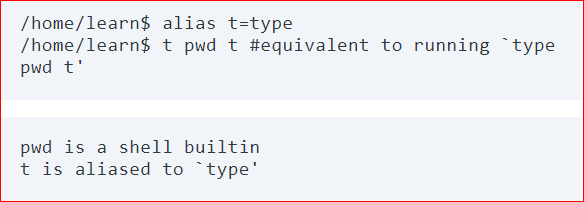

To remove this alias, we can just run unalias t. To see all the available aliases, we can run alias (without any argument).

Task:

1. Create an alias called d for the command date.
2. Run d.
3. Unalias d.

We saw that pwd is a built-in command. However, it also exists as a file in /bin/pwd.

/home/learn$ type -t /bin/pwd

file

A potential issue occurs when commands of different types have the same name (like pwd the builtin, and pwd the file).

How does the shell decide which of these commands should have priority over the others? First, any aliases are replaced by whatever their definitions are (in our previous example t expanded to type), then the shell figures it out. The order will depend on the shell and its settings, but it roughly goes:

1. Aliases
2. Special built-ins (a small list of built-ins that are considered special)
3. Functions
4. Regular built-ins
5. And then it will look for files in a select list of directories called **PATH** 

Let's investigate the ls command:

/home/learn$ type ls

ls is aliased to `ls --color=auto'

It is an alias of itself! So what is the real ls? We can use a trick to find out:

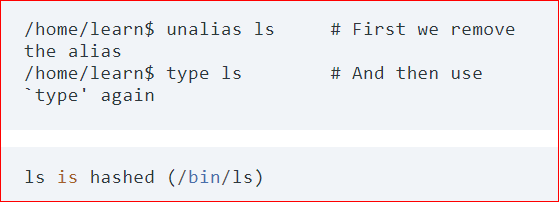

And we see that ls is a file as well. The message we got is slightly different from the one we got with cp (cp is /bin/cp). For our purposes they mean the same thing, their difference is due to a performance booster that Bash uses.

In Bash, we could also use the -P option by running type -P ls and it would give us /bin/ls, but this option isn't portable.

Why do we care what ls we're using? Isn't it enough that we can use it? We go back to the notion that *nix systems are multiuser systems. Many times, servers will have multiple installations of the same program — possibly with different versions — which can lead to unexpected behavior. By knowing what we're running, we prevent problems from occurring and are able to debug when they happen.

# Documentation of commands

We've seen a few examples of documentation of commands in the shell, but how do we access them? One possibility is to use a search engine to search for something like "shell command" and find the appropriate documentation.

Aliases and functions do not have documentation. Keywords, due to their very different nature as commands, are usually documented as part of other shell features and will not be covered here.

Fortunately, shells provide us with a utility to access documentation of programs without leaving the command line interface: the man (for manual) command.

Documentation can be hard to read, but learning how to read it is a necessary skill for anyone who programs.

To use man to access documentation, we can run man < utility >, where < utility > is a placeholder for the program whose documentation we wish to see. This command will display the documentation in an interactive program called **less**. The displayed document is usually called the **man page**.
    
We will use up and down arrow keys, which we can use to navigate the document, and the **"Q"** key, which we can use to quit the man page and regain access to the prompt.

**man pwd**

The structure of a man page can vary, but we will usually be interested in the following sections:

* NAME: The command's name and a brief description of what it does.
* SYNOPSIS: The allowed syntax.
* DESCRIPTION: A description of the command. It frequently includes information about its options.
* OPTIONS: When not included in the section above, the options are documented in this section.

The man pages are an overkill if we're just trying to get a sense of what a program's utility is. If we explored /bin or /usr/bin, we most likely found many programs we weren't familiar with. The whatis command allows us to quickly explore the programs in these directories. Here's an example:

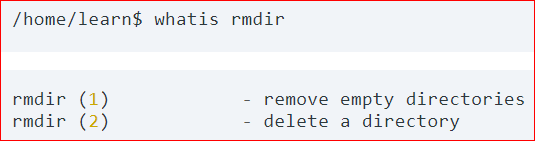

If we're curious about why there are two entries for one command (hint: it's not because there are two installations of the same command), we can explore the man page of man; we can access it by running man man.

For an intermediate approach (especially when the man page is very large), we can also try <program> --help. Many programs implement a help option that will display a summarized version of the man page.

1. Run man bash
2. run mkdir --help

Above we accessed the manual page for Bash. We were able to do this because Bash is a file as well.

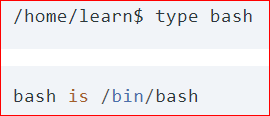

Since Bash's built-in commands are part of Bash, the natural place to look for the documentation regarding built-in commands is precisely man bash. An obvious downside is that to reach the documentation of a simple command, we need to navigate the whole Bash man page. People have been known to say that Bash's man page is not very friendly.

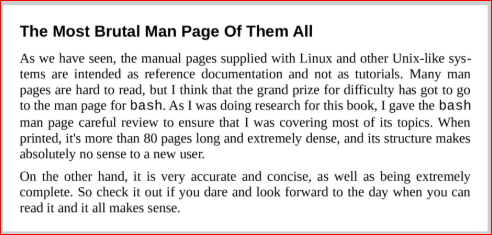

Fortunately, Bash (and other shells), allow us to access documentation for built-in commands with the assistance of the help command. For instance, help alias displays the following:



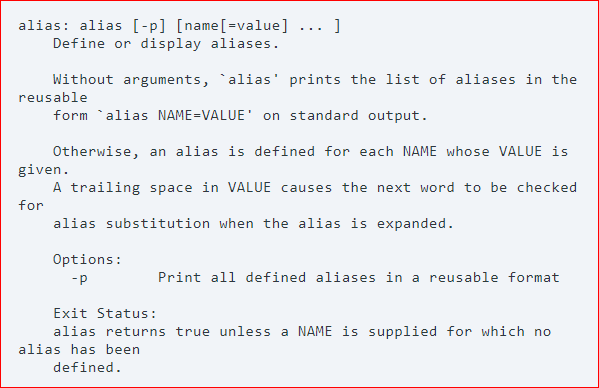

We can summarize :

* We use man to access the documentation of programs.
* We use help to access the documentation of built-in commands (in Bash).

Question:

1. Display the documentation for the type command.
2. Display the documentation for the help command.

Answer:

1. help type
2. help help

As we just saw, the output of help starts with a [usage message](https://en.wikipedia.org/wiki/Usage_message). In the man pages, the usage message occurs in the synopsis section. These messages typically are very dense, which can make them hard to read.

Fortunately, the man page for man gives us a clue on how to read them:

Let's see a couple of examples.

The usage message of ls is:

**ls** [OPTION]... [FILE]...
       
Here's a breakdown:

* Because ls is in bold, it should be typed exactly like that.
* Since every argument is encapsulated in square brackets, every argument is optional.
* Given that OPTION and FILE are underlined, these words should be replaced with appropriate arguments and not typed as is. Instead of underlining, it's common to italicize, or even do both.
* The presence of ellipsis (...) following OPTION indicates that there can be several options. The same goes for FILE.

If we think back, this is consistent with our experience with ls.

Let's see another example. The usage message of cd is

       cd [-L|[-P [-e]] [-@]] [dir]

Because cd is a built-in command, the usage message comes from help cd, which uses a different style (no bold text and no underlining), but the general rules still apply. Here's a breakdown:

* cd is mandatory and should be written as is.
* Every argument is optional.
* Let's breakdown [-L|[-P [-e]] [-@]].
 * The available options are -L, -P, -e and -@.
 * Since | separates -L from the rest of options, -L can't be used in conjunction with the other options.
 * [-P [-e]] indicates that in case -P is used, we can choose whether or not to use -e, but we can't use -e without -P.
 * We can also elect to use with -@, regardless of whether we include -P.
* [dir] indicates that we can also include (or not) an optional argument.
 * To constrast with ls, note the lack of ellipsis. This argument isn't repeatable.

We'll also occasionally see angle brackets (< >) to signify that an argument is replaceable and mandatory.

We should be mindful of the fact that incompatible arguments do not necessarily cause the command to yield an error. Many times there are fail-safe features that will still run a command with incompatible options (albeit with potentially insidious side effects).

# Task 

In the following exercise, we'll assess whether the use of the commands listed below is legal according to the rules we just learned (and not to whether the commands run). We may need to consult the documentation for the commands.

Question:

Each of the below arguments should be yes if the command is legal, and no otherwise.

* id dq root Yes or no?
* whatis -rw python Yes or no?
* cd -Pe Yes or no?

answer:
* no 
* no
* yes

We mentioned that man uses a program called **less** to show documentation, which is an example of a terminal pager. A terminal pager is a program used to view the contents of a text file by navigating it page by page (or line by line).Another example of a pager is **more**, which actually predates **less**.

We already learned that we can navigate documents with less by using the up and down arrow keys. Here is a table with a few **less** features.

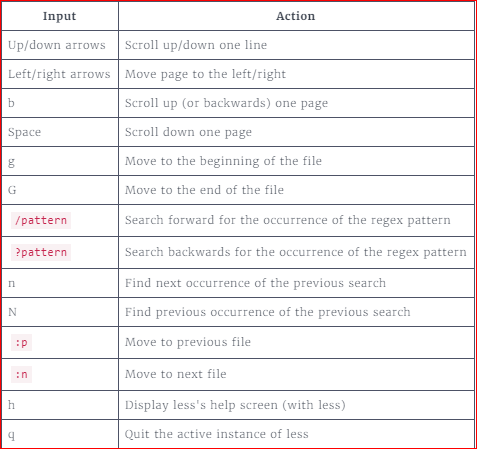

We may have noticed that less allows us to search for text using regular expressions. The principles are the same as the ones we learn in the Python regular expressions, but the special characters used are sometimes different. We can learn about one of the most popular regular expressions syntaxes used in shells in [GNU Project](https://en.wikipedia.org/wiki/GNU_Project)'s [page for that effect](https://www.gnu.org/software/grep/manual/html_node/Regular-Expressions.html).

By default, less will wrap lines that do not fit the screen. We can disable this by using the -S option.

As mentioned, less is a pager; it reads text files. To view the contents of the files file1 and file2, we can run less file1 file2. We'll then be able to navigate through the files by using the commands :p and :n, as explained in the table above.

Question:

1. Enter the directory /home/Waqas.Ali/rg_data.
2. Run less -S Arts Education. Explore the files with less. Try a few of the options in the table above.

Answer:

1. cd ~/rg_data
2. less -S Arts Education